In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data preprocessing**

In [ ]:
train_dir='/content/drive/MyDrive/images/train'
test_dir='/content/drive/MyDrive/images/test'

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
from datetime import datetime
from time import strftime

In [ ]:
print(os.listdir("/content/drive/MyDrive/images/train"))

SIZE = 256  #Resize images

['Glass', 'Can', 'plastique0.5L', 'plastique1.5L', 'plastique1L', 'plastique0.3L', 'pltasique2L']


In [ ]:
print(os.listdir("/content/drive/MyDrive/images/test"))

['Glass', 'Can', 'plastique1L', 'plastique1.5L', 'plastique2L', 'plastique0.3L', 'plastique0.5L']


In [ ]:
#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

In [ ]:
for directory_path in glob.glob("/content/drive/MyDrive/images/train/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

Glass
/content/drive/MyDrive/images/train/Glass/02_03_2020_14_25_52.jpeg
/content/drive/MyDrive/images/train/Glass/02_03_2020_14_25_56.jpeg
/content/drive/MyDrive/images/train/Glass/02_03_2020_14_25_59.jpeg
/content/drive/MyDrive/images/train/Glass/02_03_2020_14_26_03.jpeg
/content/drive/MyDrive/images/train/Glass/02_03_2020_14_26_06.jpeg
/content/drive/MyDrive/images/train/Glass/02_03_2020_14_26_13.jpeg
/content/drive/MyDrive/images/train/Glass/02_03_2020_14_26_17.jpeg
/content/drive/MyDrive/images/train/Glass/04_04_2020_17_07_17.jpeg
/content/drive/MyDrive/images/train/Glass/04_04_2020_17_07_28.jpeg
/content/drive/MyDrive/images/train/Glass/04_04_2020_17_07_35.jpeg
/content/drive/MyDrive/images/train/Glass/04_04_2020_17_07_49.jpeg
/content/drive/MyDrive/images/train/Glass/04_04_2020_17_07_57.jpeg
/content/drive/MyDrive/images/train/Glass/04_04_2020_17_08_03.jpeg
/content/drive/MyDrive/images/train/Glass/04_04_2020_17_08_08.jpeg
/content/drive/MyDrive/images/train/Glass/04_04_2020_17_

In [ ]:
for directory_path in glob.glob("/content/drive/MyDrive/images/train/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

Glass
Can
/content/drive/MyDrive/images/train/Can/image169.jpg
/content/drive/MyDrive/images/train/Can/image170.jpg
/content/drive/MyDrive/images/train/Can/image171.jpg
/content/drive/MyDrive/images/train/Can/image173.jpg
/content/drive/MyDrive/images/train/Can/image182.jpg
/content/drive/MyDrive/images/train/Can/image183.jpg
/content/drive/MyDrive/images/train/Can/image184.jpg
/content/drive/MyDrive/images/train/Can/image185.jpg
/content/drive/MyDrive/images/train/Can/image186.jpg
/content/drive/MyDrive/images/train/Can/image187.jpg
/content/drive/MyDrive/images/train/Can/image188.jpg
/content/drive/MyDrive/images/train/Can/image190.jpg
/content/drive/MyDrive/images/train/Can/image191.jpg
/content/drive/MyDrive/images/train/Can/image192.jpg
/content/drive/MyDrive/images/train/Can/image193.jpg
/content/drive/MyDrive/images/train/Can/image194.jpg
/content/drive/MyDrive/images/train/Can/image195.jpg
/content/drive/MyDrive/images/train/Can/image196.jpg
/content/drive/MyDrive/images/train/

In [ ]:
len(train_labels)

583

In [ ]:
len(train_images)

583

In [ ]:
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
test_images = []
test_labels = [] 

In [ ]:

for directory_path in glob.glob("/content/drive/MyDrive/images/test/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

Glass
Can
/content/drive/MyDrive/images/test/Can/image172.jpg
/content/drive/MyDrive/images/test/Can/image174.jpg
/content/drive/MyDrive/images/test/Can/image175.jpg
/content/drive/MyDrive/images/test/Can/image176.jpg
/content/drive/MyDrive/images/test/Can/image177.jpg
/content/drive/MyDrive/images/test/Can/image178.jpg
/content/drive/MyDrive/images/test/Can/image179.jpg
/content/drive/MyDrive/images/test/Can/image180.jpg
/content/drive/MyDrive/images/test/Can/image181.jpg
/content/drive/MyDrive/images/test/Can/image189.jpg
/content/drive/MyDrive/images/test/Can/image200.jpg
/content/drive/MyDrive/images/test/Can/image203.jpg
/content/drive/MyDrive/images/test/Can/image204.jpg
/content/drive/MyDrive/images/test/Can/image205.jpg
/content/drive/MyDrive/images/test/Can/image206.jpg
/content/drive/MyDrive/images/test/Can/image207.jpg
/content/drive/MyDrive/images/test/Can/image208.jpg
/content/drive/MyDrive/images/test/Can/image209.jpg
/content/drive/MyDrive/images/test/Can/image211.jpg
/c

In [ ]:
for directory_path in glob.glob("/content/drive/MyDrive/images/test/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

Glass
/content/drive/MyDrive/images/test/Glass/02_03_2020_14_25_49.jpeg
/content/drive/MyDrive/images/test/Glass/02_03_2020_14_26_10.jpeg
/content/drive/MyDrive/images/test/Glass/04_04_2020_17_07_42.jpeg
/content/drive/MyDrive/images/test/Glass/04_04_2020_17_07_45.jpeg
/content/drive/MyDrive/images/test/Glass/04_04_2020_17_08_14.jpeg
/content/drive/MyDrive/images/test/Glass/04_04_2020_17_09_26.jpeg
/content/drive/MyDrive/images/test/Glass/04_04_2020_17_10_10.jpeg
/content/drive/MyDrive/images/test/Glass/04_04_2020_17_09_48.jpeg
Can
/content/drive/MyDrive/images/test/Can/02_03_2020_15_06_21.jpeg
/content/drive/MyDrive/images/test/Can/02_03_2020_15_06_35.jpeg
/content/drive/MyDrive/images/test/Can/02_03_2020_15_06_39.jpeg
/content/drive/MyDrive/images/test/Can/02_03_2020_15_06_42.jpeg
/content/drive/MyDrive/images/test/Can/02_03_2020_15_06_52.jpeg
/content/drive/MyDrive/images/test/Can/02_03_2020_15_06_56.jpeg
/content/drive/MyDrive/images/test/Can/02_03_2020_15_06_59.jpeg
/content/drive

In [ ]:
len(test_labels)

144

In [ ]:
len(test_images)

144

In [ ]:
#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
#Load a trained model to use its feautures
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False

In [ ]:
#Now, let us use features from convolutional network 
feature_extractor=VGG_model.predict(x_train)


In [ ]:
feature_extractor.shape

(583, 8, 8, 512)

In [ ]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [ ]:
features.shape

(583, 32768)

In [ ]:
X_for_training = features

# **Modeling**

## **XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score

**hyperparameter tuning using grid search**

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xgb_model = xgb.XGBClassifier()

In [ ]:
random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=5)

In [ ]:
random_search.fit(X_for_training, y_train) 

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...s_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprec

In [ ]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 0.6, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 1.0}


**Model training**

In [ ]:

model = xgb.XGBClassifier(subsample=0.6,min_child_weight=5,gamma=1,colsample_bytree=1)
print("'Début de l'entrainement :   ",datetime.now().strftime("%H:%M:%S"))
model.fit(X_for_training, y_train) 
print("'Fin de l'entrainement :   ",datetime.now().strftime("%H:%M:%S"))

'Début de l'entrainement :    16:23:45
'Fin de l'entrainement :    16:27:49


In [ ]:
#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [ ]:
#Now predict using the trained RF model. 
print("'Début de la classification :   ",datetime.now().strftime("%H:%M:%S"))
prediction = model.predict(X_test_features)
print("'Fin de la classification :   ",datetime.now().strftime("%H:%M:%S"))
#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)

'Début de la classification :    16:36:03
'Fin de la classification :    16:36:03


In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

Accuracy =  0.9097222222222222


The prediction for this image is:  ['plastique1L']
The actual label for this image is:  plastique1L


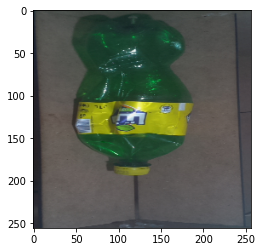

In [ ]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

## **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

**hyperparameter tuning using grid search**

In [ ]:

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
rfc=RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_for_training, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print('\n Best hyperparameters:')
print(CV_rfc.best_params_)


 Best hyperparameters:
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}


**Model training**

In [ ]:

RF_model = RandomForestClassifier(n_estimators = 500,max_features='log2',max_depth=8,criterion='entropy')

In [ ]:
# Train the model on training data
print("'Début de l'entrainement :   ",datetime.now().strftime("%H:%M:%S"))
RF_model.fit(X_for_training, y_train) #For sklearn no one hot encoding
print("'Fin de l'entrainement :   ",datetime.now().strftime("%H:%M:%S"))

'Début de l'entrainement :    16:30:21
'Fin de l'entrainement :    16:30:23


In [ ]:
#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [ ]:
#Now predict using the trained RF model. 
print("'Début de la classification :   ",datetime.now().strftime("%H:%M:%S"))
prediction_RF = RF_model.predict(X_test_features)
print("'Fin de la classification :   ",datetime.now().strftime("%H:%M:%S"))
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)


'Début de la classification :    16:34:22
'Fin de la classification :    16:34:23


In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.9027777777777778


The prediction for this image is:  ['plastique1L']
The actual label for this image is:  plastique1L


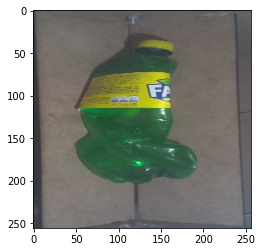

In [ ]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

# **Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

**hyperparameter tuning using grid search**

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [ ]:
log_reg=LogisticRegression()
logreg_cv=GridSearchCV(log_reg,grid)
logreg_cv.fit(X_for_training, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print('\n Best hyperparameters:')
print(logreg_cv.best_params_)


 Best hyperparameters:
{'C': 0.01, 'penalty': 'l2'}


**Model training**

In [ ]:

logreg = LogisticRegression(multi_class='multinomial',C=0.01,penalty='l2')
logreg.fit(X_for_training, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Now predict using the trained RF model. 
prediction_logreg = logreg.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction_logreg = le.inverse_transform(prediction_logreg)


In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_logreg))

Accuracy =  0.8958333333333334


The prediction for this image is:  ['plastique1L']
The actual label for this image is:  plastique1L


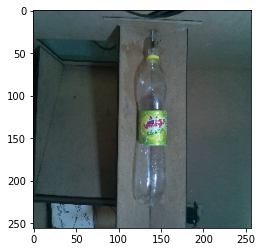

In [ ]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_logreg = logreg.predict(input_img_features)[0] 
prediction_logreg = le.inverse_transform([prediction_logreg])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_logreg)
print("The actual label for this image is: ", test_labels[n])

In [ ]:
pip install matplotlib

**Models evaluation**

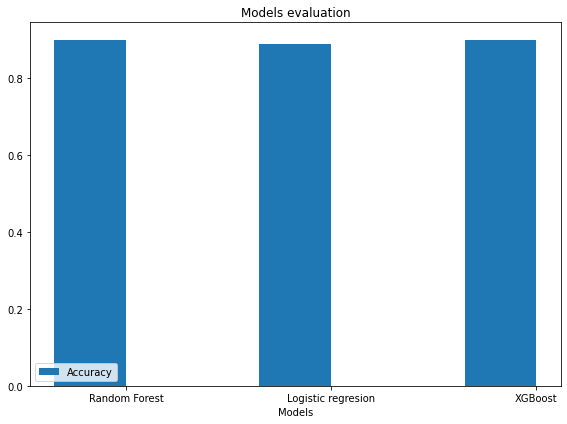

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
models = ['Random Forest','Logistic regresion','XGBoost']
accuracy = [0.9,0.89,0.9]

x = np.arange(len(models))  
width = 0.35  
fig, ax = plt.subplots(figsize=(8,6))

rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
ax.set_xlabel('Models')
ax.set_title('Models evaluation')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
#ax.bar_label(rects1, padding=3)
ax.legend(loc='lower left')

fig.tight_layout()

plt.show()